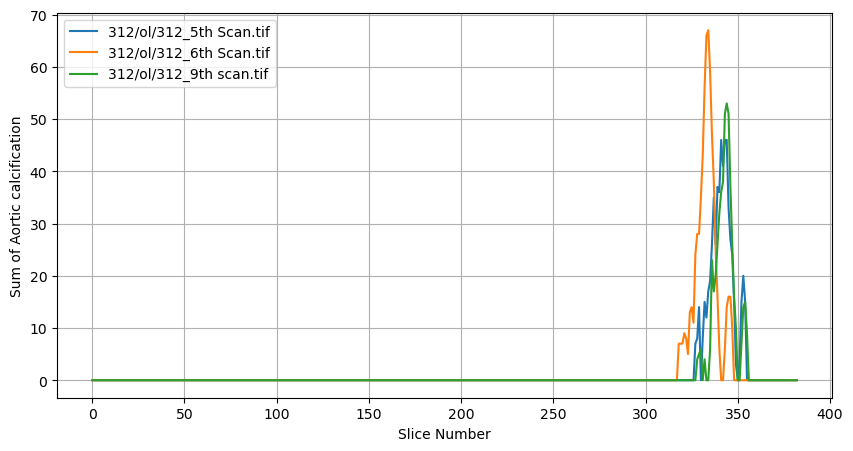

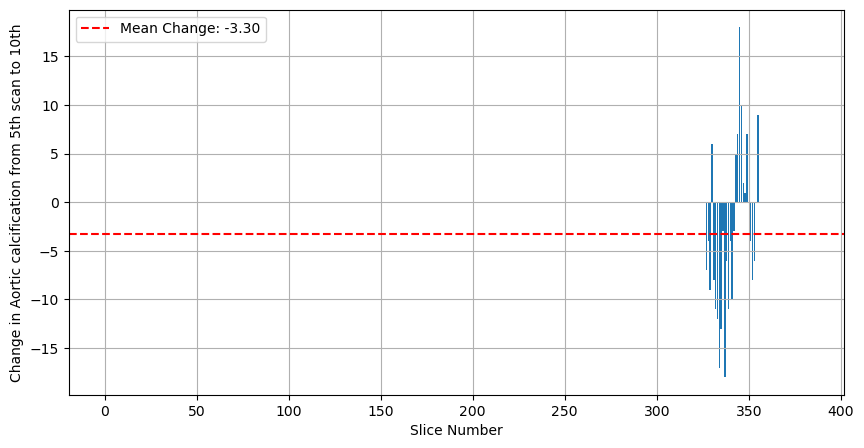

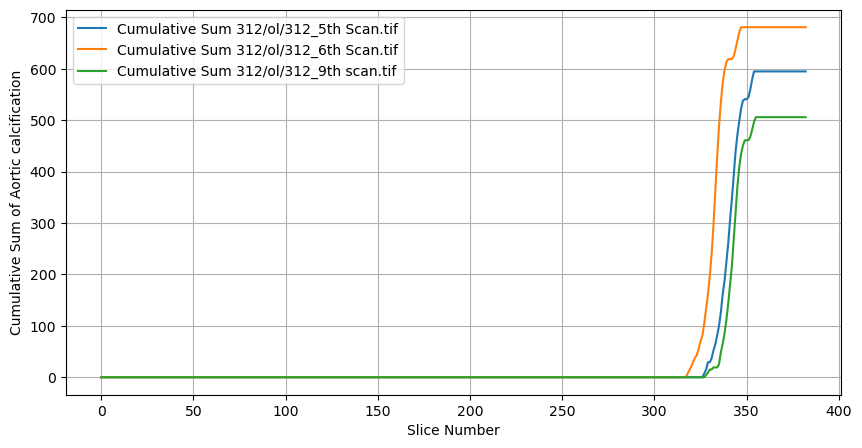

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
import os
import glob
from natsort import natsorted

directory_path = '312/ol'
tif_file_paths = glob.glob(os.path.join(directory_path, '*.tif'))
tif_file_paths = natsorted(tif_file_paths)

# Initialize an empty list to store the sum of non-zero pixels for each file
all_sum_per_slice = []

# Loop through each .tiff file
for tif_file_path in tif_file_paths:
    # Load the current .tiff file
    tiff_data = tf.imread(tif_file_path)

    # Initialize an empty list to store the sum of non-zero pixels per slice
    sum_per_slice = []

    # Loop through each image slice
    for slice_data in tiff_data:
        # Calculate the sum of non-zero pixels for the current slice
        non_zero_sum = np.sum(slice_data > 0)
        sum_per_slice.append(non_zero_sum)

    # Append the sums for the current file to the overall list
    all_sum_per_slice.append(sum_per_slice)

# Create a plot for all .tiff files in one figure
plt.figure(figsize=(10, 5))
for i, sums in enumerate(all_sum_per_slice):
    plt.plot(sums, label=tif_file_paths[i], linestyle='-')
# plt.xlim(0, len(change) - 1)
# plt.title('Sum of Non-Zero Pixels per Slice for Multiple Files')
plt.xlabel('Slice Number')
plt.ylabel('Sum of Aortic calcification')
plt.grid(True)
plt.legend()

# Calculate and plot the change from the first plot to the last plot
first_plot = all_sum_per_slice[0]
last_plot = all_sum_per_slice[-1]
change = [last - first for first, last in zip(first_plot, last_plot)]

mean_change = np.mean([val for val in change if val != 0]) # sice there are many slices with zero calcium, 
# we like to avoid them in calculating mean


# Create a bar plot for the non-zero changes
plt.figure(figsize=(10, 5))
plt.bar(range(len(change)), change)
plt.axhline(mean_change, color='red', linestyle='--', label=f'Mean Change: {mean_change:.2f}')
# plt.title('Change from First to Last Plot')
plt.xlabel('Slice Number')
plt.ylabel('Change in Aortic calcification from 5th scan to 10th')
plt.grid(True)
plt.legend()
# plt.xlim(0, len(change) - 1)


# Plot the cumulative sum of each plot
cumulative_sums = [np.cumsum(sums) for sums in all_sum_per_slice]
plt.figure(figsize=(10, 5))
for i, cumulative_sum in enumerate(cumulative_sums):
    plt.plot(cumulative_sum, label=f'Cumulative Sum {tif_file_paths[i]}', linestyle='-')

plt.xlabel('Slice Number')
plt.ylabel('Cumulative Sum of Aortic calcification')
plt.grid(True)
plt.legend()
plt.show()
plt.show()


In [47]:
!pip install natsort

  Obtaining dependency information for natsort from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.metadata


In [91]:
idx =200
# change2 = first_plot- last_plot

print(first_plot[idx], last_plot[idx])
sub= first_plot[idx]- last_plot[idx]
set1 = set(first_plot)
set2 = set(last_plot)

result = set1 - set2
change2= list(result)
print(change[idx], change2[idx], sub)

7120 5371
18446744073709549867 7058 1749


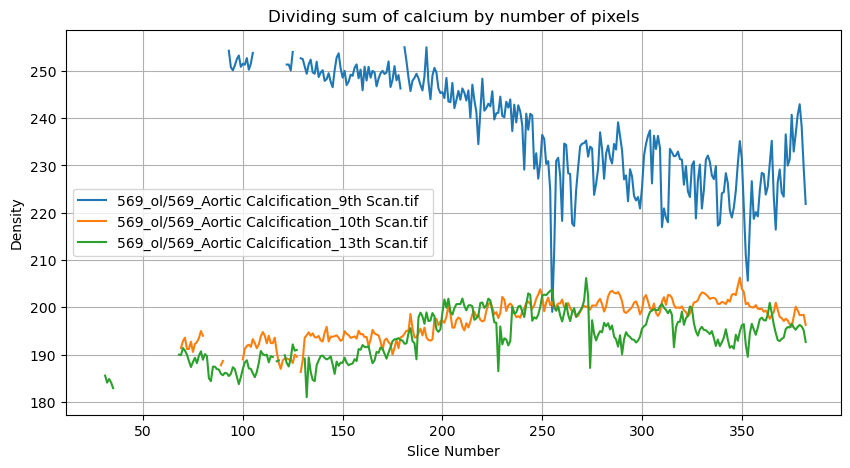

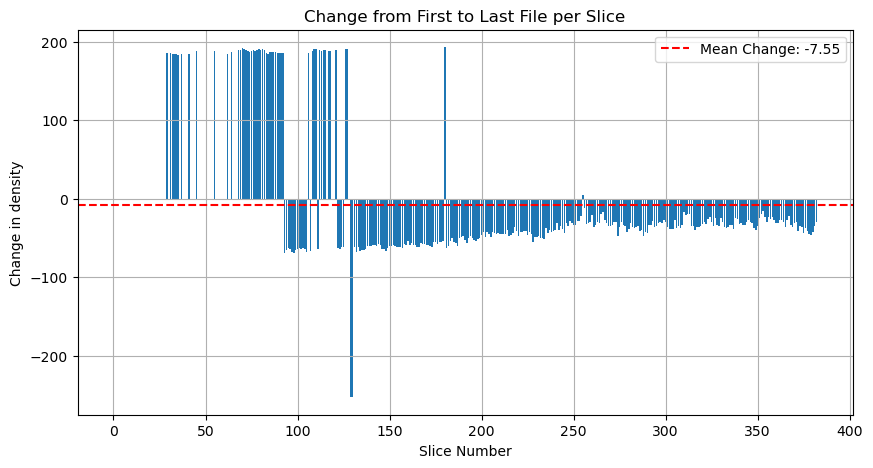

In [32]:
# dividing sum of calcium by number of pixels
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
import os

# List of .tiff file paths
tif_file_paths = ['569_ol/569_Aortic Calcification_9th Scan.tif', 
                  '569_ol/569_Aortic Calcification_10th Scan.tif', 
                  '569_ol/569_Aortic Calcification_13th Scan.tif']  # Add your file paths here

# tif_file_paths = ['568_ol/Result of 568_Aortic Calcification_6th scan.tif', 
#                   '568_ol/Result of 568_Aortic Calcification_7th Scan.tif', 
#                   '568_ol/Result of 568_Aortic Calcification_8th Scan.tif',
#                   '568_ol/Result of 568_Aortic Calcification_13th Scan.tif']  # Add your file paths here

# Initialize an empty list to store the sum of non-zero pixels for each file
# Initialize an empty list to store the sum of non-zero pixels for each file
all_sum_per_slice = []

# Loop through each .tiff file
for tif_file_path in tif_file_paths:
    # Load the current .tiff file
    tiff_data = tf.imread(tif_file_path)

    # Initialize an empty list to store the sum of non-zero pixels per slice
    sum_per_slice = []

    # Loop through each image slice
    for slice_data in tiff_data:
        # Calculate the sum of non-zero pixels for the current slice
        non_zero_sum = np.sum(slice_data[slice_data>0])
        non_zero_num = np.sum(slice_data>0)
        if non_zero_num !=0:
            calcium_density  = (non_zero_sum)/(non_zero_num )
        else: 
            calcium_density = None # because we can divide zero by zero
        # print(non_zero_sum, non_zero_num)
        sum_per_slice.append(calcium_density)

    # Append the sums for the current file to the overall list
    all_sum_per_slice.append(sum_per_slice)

# Create a single plot for all .tiff files
plt.figure(figsize=(10, 5))
for i, sums in enumerate(all_sum_per_slice):
    plt.plot(sums, label=tif_file_paths[i], linestyle='-') #label=f'File {i+1}',

plt.title('Dividing sum of calcium by number of pixels')
plt.xlabel('Slice Number')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
mean_change = np.mean(change)
# Calculate the change from the first file to the last for each slice
first_plot = all_sum_per_slice[0]
last_plot = all_sum_per_slice[-1]
# filtered_first_plot = [val for val in first_plot if val is not None]
# filtered_last_plot = [val for val in last_plot if val is not None]

filtered_first_plot = [val if val is not None else 0 for val in first_plot]
filtered_last_plot = [val if val is not None else 0 for val in last_plot]


change = [last - first for first, last in zip(filtered_first_plot, filtered_last_plot)]
mean_change = np.mean([val for val in change if val != 0])

# non_zero_change = [val for val in change if val != 0]
# non_zero_slice_numbers = [i for i, val in enumerate(change) if val != 0]

# Create a bar plot for the non-zero changes
plt.figure(figsize=(10, 5))
# plt.bar(non_zero_slice_numbers, non_zero_change)
plt.bar(range(len(change)), change)
plt.axhline(mean_change, color='red', linestyle='--', label=f'Mean Change: {mean_change:.2f}')
plt.title('Change from First to Last File per Slice')
plt.xlabel('Slice Number')
plt.ylabel('Change in density')
plt.grid(True)
plt.legend()
plt.show()



In [16]:
import numpy as np

# Load your image data into a NumPy array (replace this with your actual image data)
image_data = np.array([[0, 0, 0, 0, 0],
                       [0, 1, 2, 0, 0],
                       [0, 3, 4, 0, 0],
                       [0, 0, 0, 0, 0]])

# Count the number of non-zero pixels in the image
num_non_zero_pixels = np.sum(image_data[image_data>0])
sum_non_zero_pixels = np.sum(image_data>0)


# Print the result
print(f"Number of non-zero pixels: {num_non_zero_pixels}", sum_non_zero_pixels )


Number of non-zero pixels: 10 4


In [ ]:
# Test case
items = [1, 2, 3, 4, 5]
item = 3
idx = 2
MSI = 2

out = []
dn_pointer = idx
up_pointer = idx+1
up = abs(items[dn_pointer] - item)
dn = abs(items[dn_pointer] - item)

if item in items:
    out.append(item)
    MSI -= 1

for _ in range(MSI):
    if dn_pointer > 0:
        dn = abs(items[dn_pointer - 1] - item)

    if up < dn:
        out.append(items[idx + 1])
        up_pointer += 1
    else:
        out.append(items[idx - 1])
        dn_pointer -= 1

# Display the result
print(out)


: 

/tmp/ipykernel_2171274/3619954606.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(directory_paths))  # Get a colormap with distinct colors for each directory path


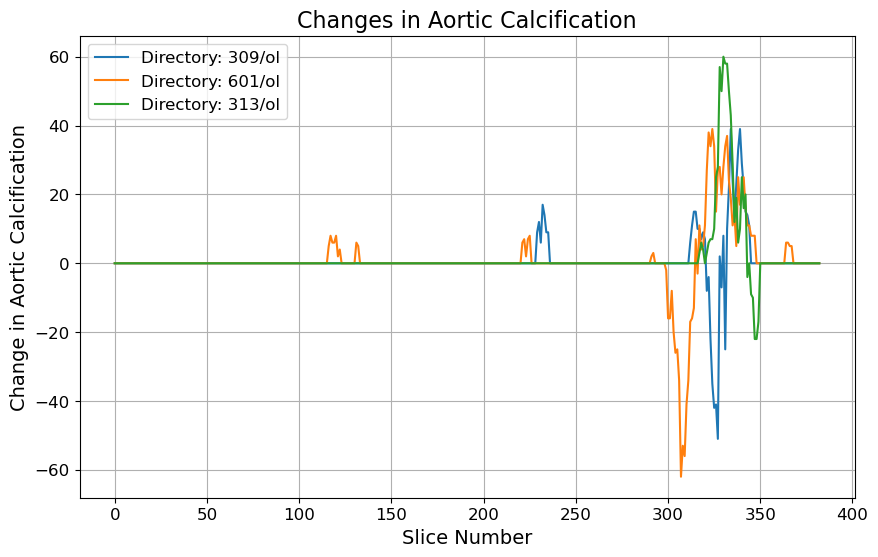

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
import os
import glob
from natsort import natsorted
import matplotlib.cm as cm  # Import colormap module

# List of directory paths
directory_paths = [
    '309/ol',
    '601/ol',
    '313/ol',
    # Add or modify other directory paths here
]

fig, ax = plt.subplots(figsize=(10, 6))  # Create a single figure
cmap = cm.get_cmap('tab10', len(directory_paths))  # Get a colormap with distinct colors for each directory path
legend_labels = []  # List to store legend labels

for idx, directory_path in enumerate(directory_paths):
    tif_file_paths = glob.glob(os.path.join(directory_path, '*.tif'))
    tif_file_paths = natsorted(tif_file_paths)

    # Initialize an empty list to store the sum of non-zero pixels for each file
    all_sum_per_slice = []

    # Loop through each .tiff file
    for tif_file_path in tif_file_paths:
        # Load the current .tiff file
        tiff_data = tf.imread(tif_file_path)

        # Initialize an empty list to store the sum of non-zero pixels per slice
        sum_per_slice = []

        # Loop through each image slice
        for slice_data in tiff_data:
            # Calculate the sum of non-zero pixels for the current slice
            non_zero_sum = np.sum(slice_data > 0)
            sum_per_slice.append(non_zero_sum)

        # Append the sums for the current file to the overall list
        all_sum_per_slice.append(sum_per_slice)

    # Calculate the change in aortic calcification for each file
    changes = []
    for i in range(len(all_sum_per_slice) - 1):
        first_plot = all_sum_per_slice[i]
        last_plot = all_sum_per_slice[i + 1]
        change = [last - first for first, last in zip(first_plot, last_plot)]
        changes.append(change)

    # Plot the changes in aortic calcification
    for i, change in enumerate(changes):
        label = f"{os.path.basename(tif_file_paths[i])} to {os.path.basename(tif_file_paths[i + 1])}"
        line, = ax.plot(change, label=label)#, color=cmap(idx))

    legend_labels.append(f"Directory: {directory_path}")

# Customize the plot for better visualization
ax.set_title('Changes in Aortic Calcification', fontsize=16)
ax.set_xlabel('Slice Number', fontsize=14)
ax.set_ylabel('Change in Aortic Calcification', fontsize=14)
ax.grid(True)
ax.legend(legend_labels, fontsize=12, loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()